1.Business Understanding:

The primary objective of this project is to analyze the spread and trends of COVID-19 across various countries using the countries-aggregated dataset. We aim to understand the global and country-specific impacts by exploring cases, recoveries, and deaths over time.



2.Data Understanding:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns                        
import matplotlib.pyplot as plt              
%matplotlib inline     
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('/kaggle/input/coronavirus/countries-aggregated_csv.csv')

In [3]:
df

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-22,Albania,0,0,0
2,2020-01-22,Algeria,0,0,0
3,2020-01-22,Andorra,0,0,0
4,2020-01-22,Angola,0,0,0
...,...,...,...,...,...
39475,2020-08-18,West Bank and Gaza,17306,9939,113
39476,2020-08-18,Western Sahara,10,8,1
39477,2020-08-18,Yemen,1889,1052,537
39478,2020-08-18,Zambia,9981,8776,264


In [4]:
#Creating Active column for the dataset
df['Active']=df['Confirmed']-df['Recovered']-df['Deaths']

In [5]:
#converted values date waise
df = df.sort_values(['Date','Country']).reset_index(drop=True) 
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
df

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0
...,...,...,...,...,...,...
39475,2020-08-18,West Bank and Gaza,17306,9939,113,7254
39476,2020-08-18,Western Sahara,10,8,1,1
39477,2020-08-18,Yemen,1889,1052,537,300
39478,2020-08-18,Zambia,9981,8776,264,941


In [7]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [8]:
df.tail()

,Date,Country,Confirmed,Recovered,Deaths,Active
39475,2020-08-18,West Bank and Gaza,17306,9939,113,7254
39476,2020-08-18,Western Sahara,10,8,1,1
39477,2020-08-18,Yemen,1889,1052,537,300
39478,2020-08-18,Zambia,9981,8776,264,941
39479,2020-08-18,Zimbabwe,5378,4105,141,1132


In [9]:
df.describe()

,Date,Confirmed,Recovered,Deaths,Active
count,39480,3.948000e+04,3.948000e+04,39480.000000,3.948000e+04
mean,2020-05-05 12:00:00,3.184366e+04,1.660607e+04,1497.821530,1.373977e+04
min,2020-01-22 00:00:00,0.000000e+00,0.000000e+00,0.000000,-2.000000e+00
25%,2020-03-14 00:00:00,6.000000e+00,0.000000e+00,0.000000,1.000000e+00
50%,2020-05-05 12:00:00,4.400000e+02,9.300000e+01,7.000000,1.300000e+02
75%,2020-06-27 00:00:00,5.604250e+03,1.924250e+03,111.000000,1.921000e+03
max,2020-08-18 00:00:00,5.482416e+06,2.751246e+06,171821.000000,3.412436e+06
std,NaN,2.059053e+05,1.008845e+05,8660.986515,1.150803e+05


In [10]:
df.shape

(39480, 6)

In [11]:
#getting more data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39480 entries, 0 to 39479
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       39480 non-null  datetime64[ns]
 1   Country    39480 non-null  object        
 2   Confirmed  39480 non-null  int64         
 3   Recovered  39480 non-null  int64         
 4   Deaths     39480 non-null  int64         
 5   Active     39480 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 1.8+ MB


In [12]:
df.dtypes

Date         datetime64[ns]
Country              object
Confirmed             int64
Recovered             int64
Deaths                int64
Active                int64
dtype: object

In [13]:
df.columns

Index(['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Active'], dtype='object')

Are there strong correlations between Confirmed, Recovered, and Deaths?

In [14]:
numerical_data = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()

<Axes: >

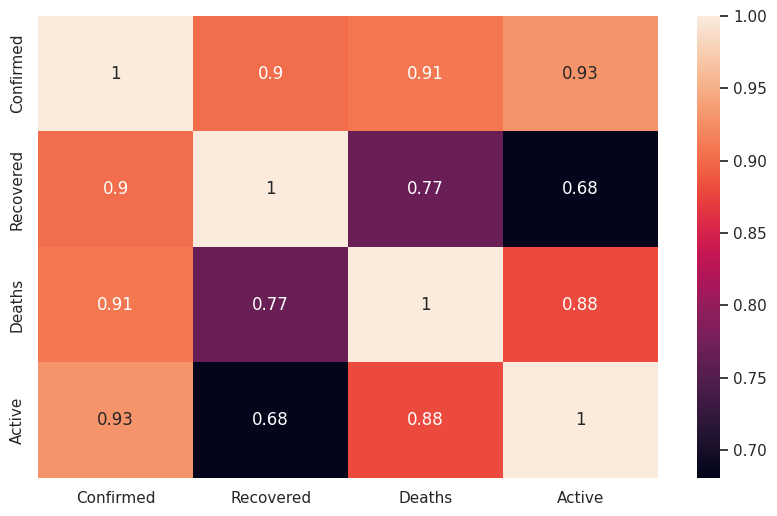

In [15]:
#drawing the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True)

3.Data Preparation

In [16]:
# checking missing values
df.isna().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
Active       0
dtype: int64

In [17]:
#checking for duplicates
df.duplicated().any()

False

In [18]:
# Again checking the size of data
df.shape

(39480, 6)

4.Data Preprocessing:

In [19]:
# Dividing the dat into categorial and numerical columns
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [20]:
# checking contents of categorial column
# Here we dont have any categorial column  
cate_val 

[]

In [21]:
# checking contents of numerical column
cont_val

['Date', 'Country', 'Confirmed', 'Recovered', 'Deaths', 'Active']

5.Feature Scaling

In [22]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,0,0,0,0
1,2020-01-22,Albania,0,0,0,0
2,2020-01-22,Algeria,0,0,0,0
3,2020-01-22,Andorra,0,0,0,0
4,2020-01-22,Angola,0,0,0,0


In [23]:
from sklearn.preprocessing import StandardScaler
cont_val = ['Confirmed', 'Deaths', 'Recovered']
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [24]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Active
0,2020-01-22,Afghanistan,-0.154654,-0.164607,-0.172941,0
1,2020-01-22,Albania,-0.154654,-0.164607,-0.172941,0
2,2020-01-22,Algeria,-0.154654,-0.164607,-0.172941,0
3,2020-01-22,Andorra,-0.154654,-0.164607,-0.172941,0
4,2020-01-22,Angola,-0.154654,-0.164607,-0.172941,0


6.splitting the dataset into Training set and Test set

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Creating Independent variables
X=df.drop('Active',axis=1)
y = df['Active'] 

In [27]:
X

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,-0.154654,-0.164607,-0.172941
1,2020-01-22,Albania,-0.154654,-0.164607,-0.172941
2,2020-01-22,Algeria,-0.154654,-0.164607,-0.172941
3,2020-01-22,Andorra,-0.154654,-0.164607,-0.172941
4,2020-01-22,Angola,-0.154654,-0.164607,-0.172941
...,...,...,...,...,...
39475,2020-08-18,West Bank and Gaza,-0.070605,-0.066087,-0.159894
39476,2020-08-18,Western Sahara,-0.154605,-0.164528,-0.172826
39477,2020-08-18,Yemen,-0.145480,-0.154179,-0.110938
39478,2020-08-18,Zambia,-0.106180,-0.077615,-0.142459


In [28]:
y

0           0
1           0
2           0
3           0
4           0
         ... 
39475    7254
39476       1
39477     300
39478     941
39479    1132
Name: Active, Length: 39480, dtype: int64

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
#Checking the training data of X
X_train

,Date,Country,Confirmed,Recovered,Deaths
21150,2020-05-13,Kyrgyzstan,-0.149584,-0.157410,-0.171556
9169,2020-03-10,San Marino,-0.154406,-0.164607,-0.172710
20877,2020-05-12,Austria,-0.077137,-0.024366,-0.101008
8421,2020-03-06,Serbia,-0.154649,-0.164607,-0.172941
36838,2020-08-04,United Kingdom,1.340839,-0.150283,4.596899
...,...,...,...,...,...
6265,2020-02-24,Finland,-0.154649,-0.164597,-0.172941
11284,2020-03-22,Angola,-0.154644,-0.164607,-0.172941
38158,2020-08-11,Vietnam,-0.150448,-0.160136,-0.171094
860,2020-01-26,Maldives,-0.154654,-0.164607,-0.172941


In [31]:
#Checking training data of y
y_train

21150       306
9169         49
20877      1190
8421          1
36838    265170
          ...  
6265          0
11284         2
38158       399
860           0
15795       471
Name: Active, Length: 31584, dtype: int64

In [32]:
#Checking testing data of X
X_test

,Date,Country,Confirmed,Recovered,Deaths
1682,2020-01-30,United Kingdom,-0.154654,-0.164607,-0.172941
27289,2020-06-15,Cabo Verde,-0.150963,-0.161237,-0.172133
30738,2020-07-03,Kyrgyzstan,-0.121250,-0.138131,-0.164166
33494,2020-07-18,Cambodia,-0.153823,-0.163289,-0.172941
6426,2020-02-25,Chad,-0.154654,-0.164607,-0.172941
...,...,...,...,...,...
37229,2020-08-07,Antigua and Barbuda,-0.154207,-0.163854,-0.172595
1385,2020-01-29,Grenada,-0.154654,-0.164607,-0.172941
19812,2020-05-06,Guinea-Bissau,-0.152347,-0.164369,-0.172710
5963,2020-02-22,Philippines,-0.154639,-0.164597,-0.172826


In [33]:
#Checking the testing data of y
y_test

1682        0
27289     413
30738    4131
33494      38
6426        0
         ... 
37229      13
1385        0
19812     449
5963        1
31070       0
Name: Active, Length: 7896, dtype: int64

7.EDA

Which countries had the highest cases?

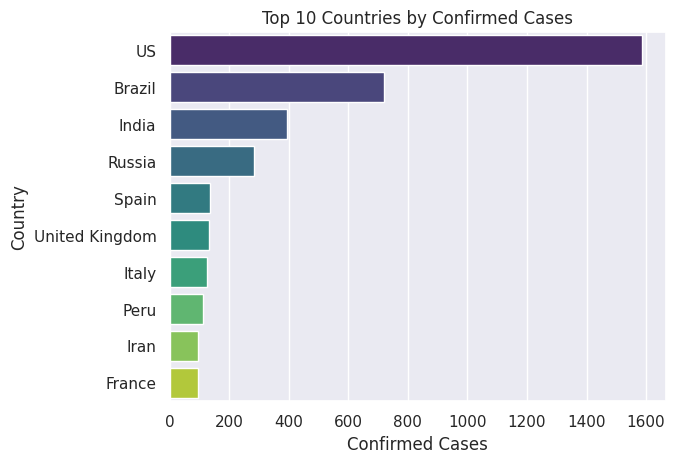

In [34]:
# Get top 10 countries by Confirmed cases
top_countries = df.groupby('Country')['Confirmed'].sum().nlargest(10)

# Plot countplot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

# Add labels and title
plt.title('Top 10 Countries by Confirmed Cases')
plt.xlabel('Confirmed Cases')
plt.ylabel('Country')

# Show the plot
plt.show()


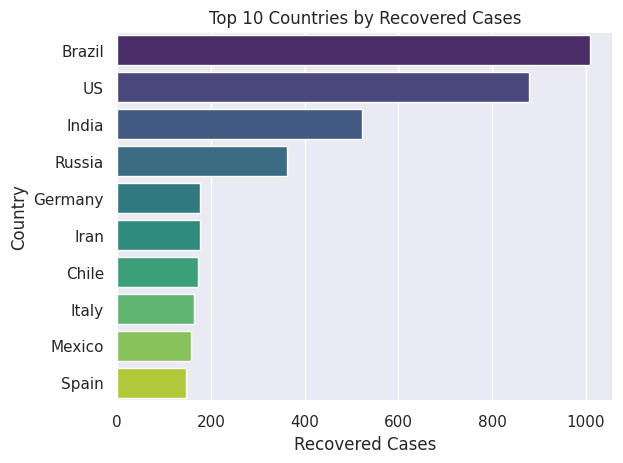

In [35]:
# Get top 10 countries by Recovered cases
top_countries = df.groupby('Country')['Recovered'].sum().nlargest(10)

# Plot countplot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
# Add labels and title
plt.title('Top 10 Countries by Recovered Cases')
plt.xlabel('Recovered Cases')
plt.ylabel('Country')

# Show the plot
plt.show()

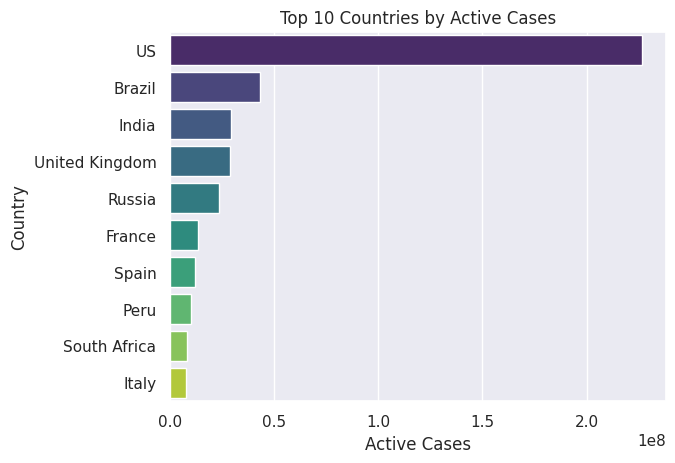

In [36]:
# Get top 10 countries by Active cases
top_countries = df.groupby('Country')['Active'].sum().nlargest(10)

# Plot countplot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
# Add labels and title
plt.title('Top 10 Countries by Active Cases')
plt.xlabel('Active Cases')
plt.ylabel('Country')

# Show the plot
plt.show()

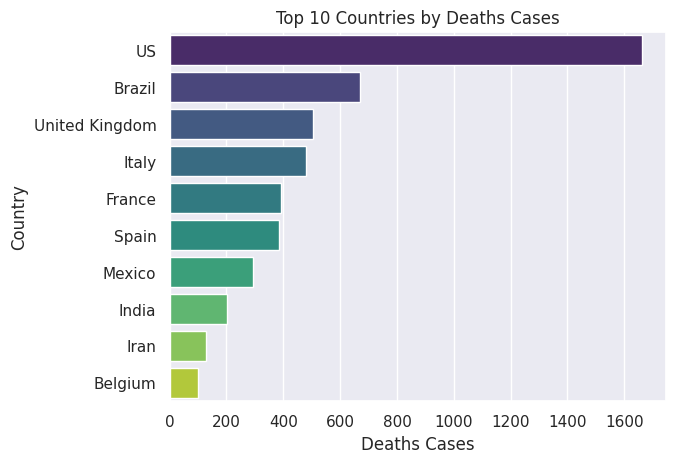

In [37]:
# Get top 10 countries by Deaths cases
top_countries = df.groupby('Country')['Deaths'].sum().nlargest(10)

# Plot countplot
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
# Add labels and title
plt.title('Top 10 Countries by Deaths Cases')
plt.xlabel('Deaths Cases')
plt.ylabel('Country')

# Show the plot
plt.show()

How did cases change over time?

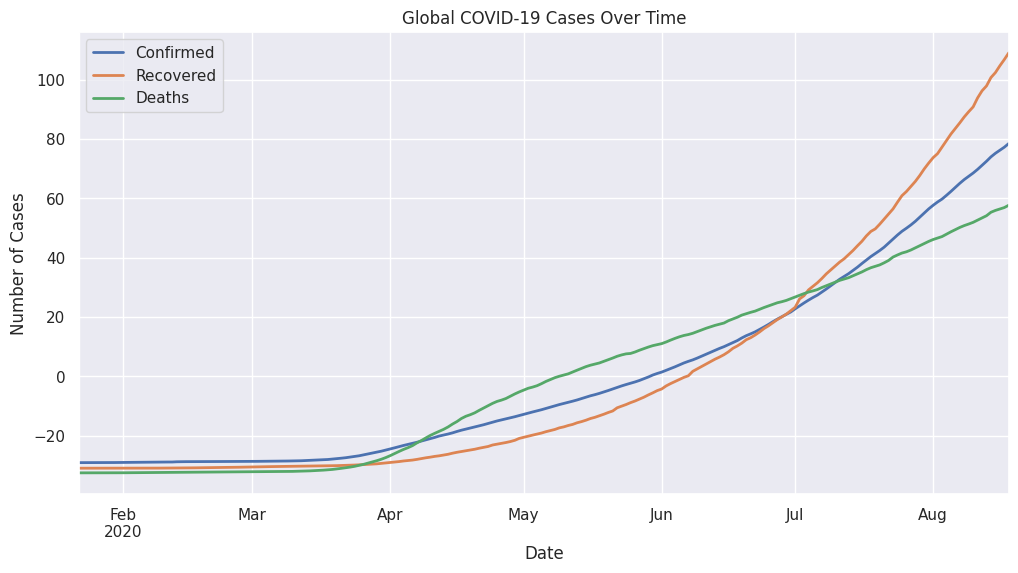

In [38]:
# Group by date and sum up the cases globally
global_cases = df.groupby('Date')[['Confirmed', 'Recovered', 'Deaths']].sum()

# Plot the cases over time
global_cases.plot(figsize=(12, 6), lw=2)
plt.title('Global COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.legend(['Confirmed', 'Recovered', 'Deaths'])
plt.show()

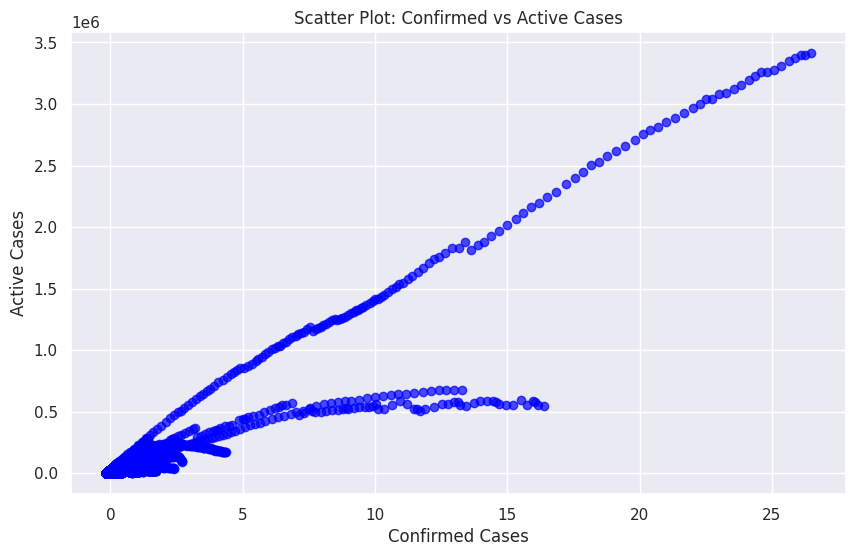

In [39]:
# Create a scatter plot for confirmed vs. active cases
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Confirmed'], df['Active'], alpha=0.7, color='blue')  # Scatter plot
ax.set_xlabel('Confirmed Cases')  # Label for x-axis
ax.set_ylabel('Active Cases')  # Label for y-axis
ax.set_title('Scatter Plot: Confirmed vs Active Cases')  # Title of the plot
plt.show()

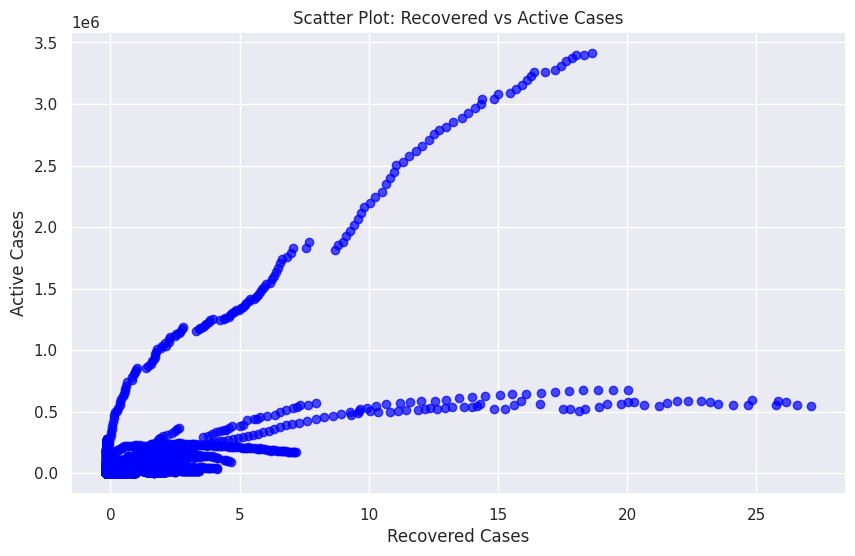

In [40]:
# Create a scatter plot for Recovered vs. active cases
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Recovered'], df['Active'], alpha=0.7, color='blue')  # Scatter plot
ax.set_xlabel('Recovered Cases')  # Label for x-axis
ax.set_ylabel('Active Cases')  # Label for y-axis
ax.set_title('Scatter Plot: Recovered vs Active Cases')  # Title of the plot
plt.show()

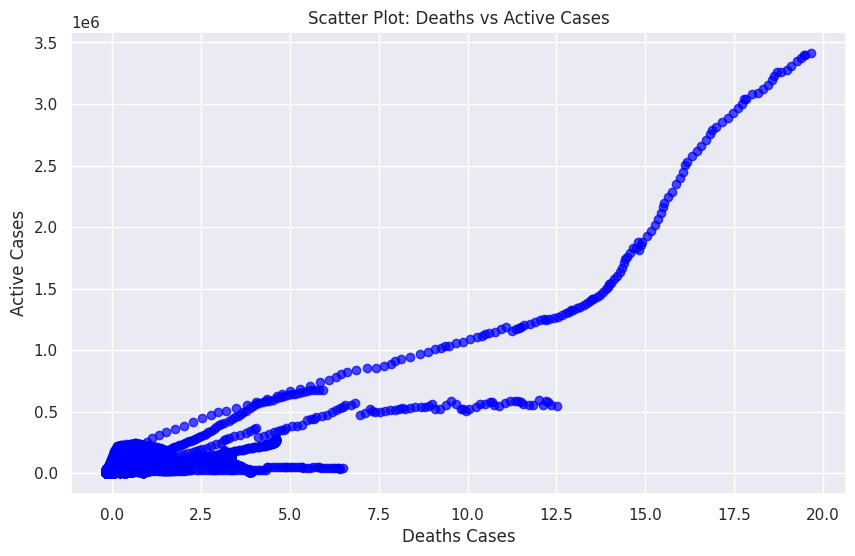

In [41]:
# Create a scatter plot for Deaths vs. active cases
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(df['Deaths'], df['Active'], alpha=0.7, color='blue')  # Scatter plot
ax.set_xlabel('Deaths Cases')  # Label for x-axis
ax.set_ylabel('Active Cases')  # Label for y-axis
ax.set_title('Scatter Plot: Deaths vs Active Cases')  # Title of the plot
plt.show()

Time Series Analysis

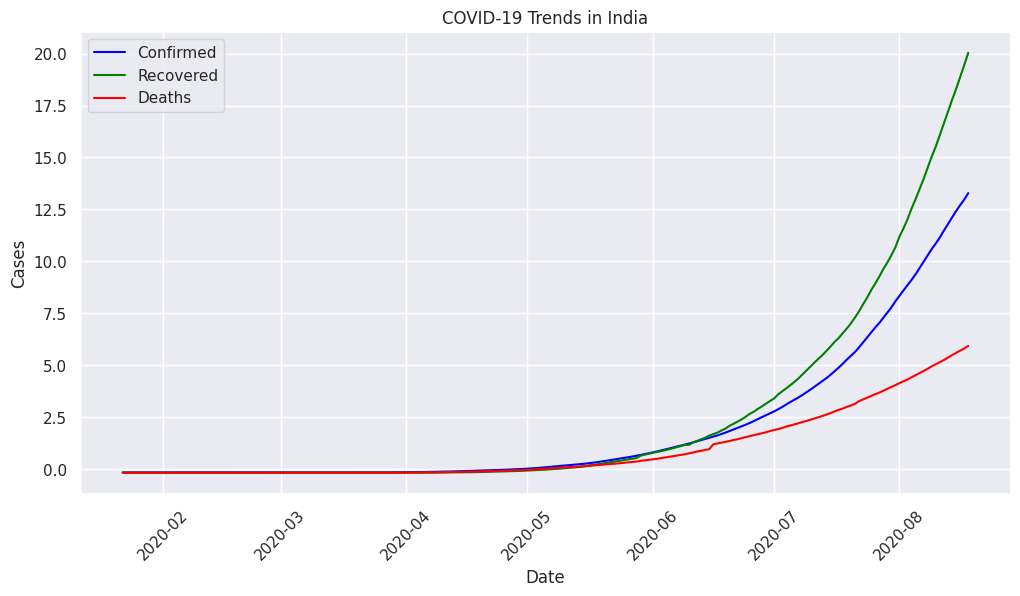

In [42]:
country = 'India'   
df_country = df[df['Country'] == country]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df_country, label='Confirmed', color='blue')
sns.lineplot(x='Date', y='Recovered', data=df_country, label='Recovered', color='green')
sns.lineplot(x='Date', y='Deaths', data=df_country, label='Deaths', color='red')

plt.title(f'COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()


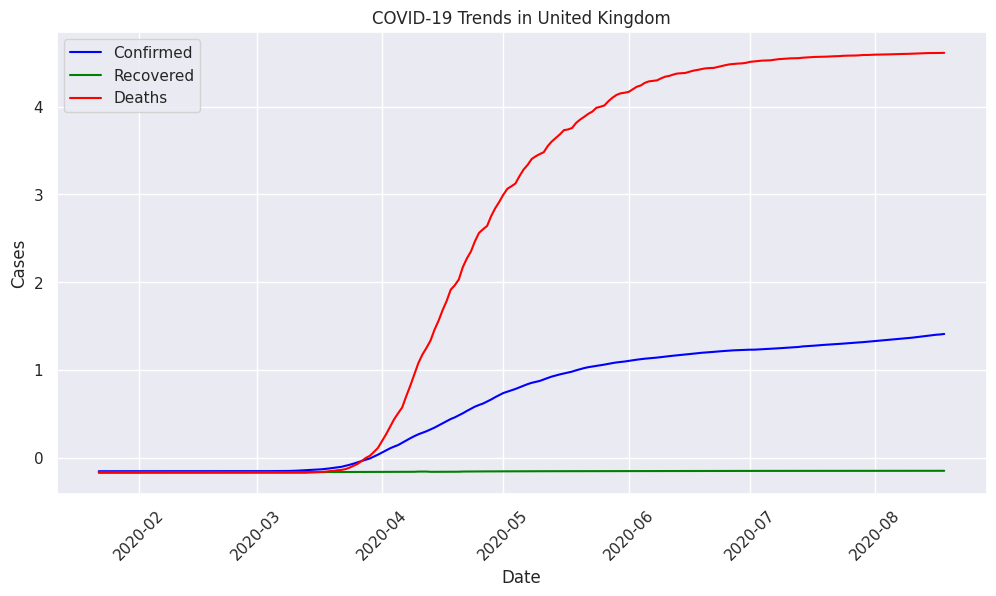

In [43]:
country = 'United Kingdom'   
df_country = df[df['Country'] == country]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df_country, label='Confirmed', color='blue')
sns.lineplot(x='Date', y='Recovered', data=df_country, label='Recovered', color='green')
sns.lineplot(x='Date', y='Deaths', data=df_country, label='Deaths', color='red')

plt.title(f'COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

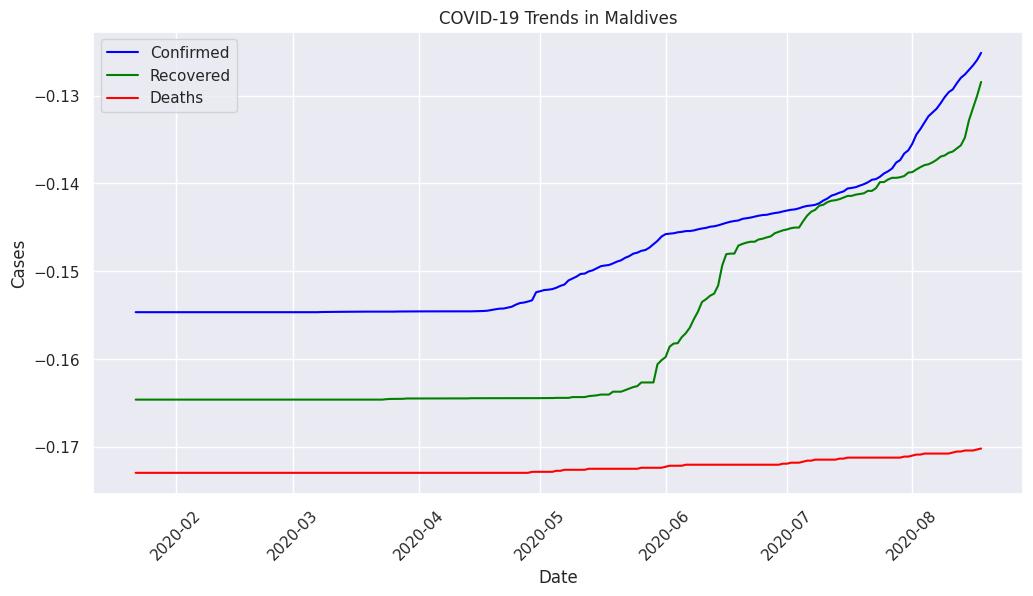

In [44]:
country = 'Maldives'   
df_country = df[df['Country'] == country]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df_country, label='Confirmed', color='blue')
sns.lineplot(x='Date', y='Recovered', data=df_country, label='Recovered', color='green')
sns.lineplot(x='Date', y='Deaths', data=df_country, label='Deaths', color='red')

plt.title(f'COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()

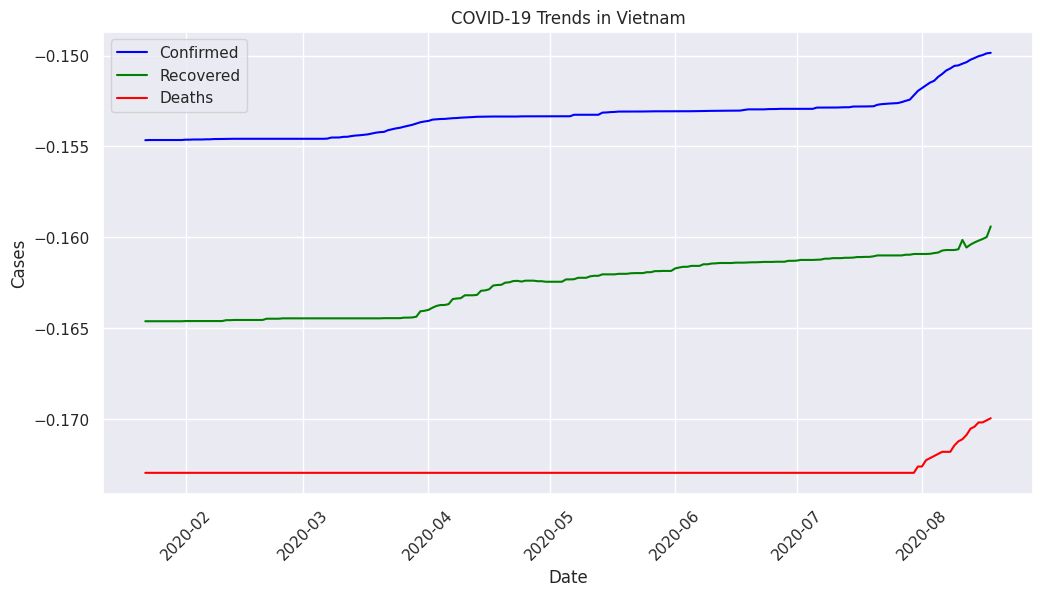

In [45]:
country = 'Vietnam'   
df_country = df[df['Country'] == country]

plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Confirmed', data=df_country, label='Confirmed', color='blue')
sns.lineplot(x='Date', y='Recovered', data=df_country, label='Recovered', color='green')
sns.lineplot(x='Date', y='Deaths', data=df_country, label='Deaths', color='red')

plt.title(f'COVID-19 Trends in {country}')
plt.xlabel('Date')
plt.ylabel('Cases')
plt.legend()
plt.xticks(rotation=45)
plt.show()